Indian Companies Sustainability Reports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install chardet

In [3]:
import chardet
with open('/content/data_companies.csv','rb')as f:
  encoding=chardet.detect(f.read())['encoding']
  print(f"Encoding of the CSV file:{encoding}")


Encoding of the CSV file:Windows-1252


In [4]:
import pandas as pd
data_companies=pd.read_csv('/content/data_companies.csv',encoding=encoding)
data_companies.head()


,Company,Sector,No. of Employees 2022,No. of Employees 2021,Revenue(Billion $) 2022,Revenue(Crore Rs.) 2021,Location (Origin),Twitter Username,Followers,CEO(Gender),...,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276
0,Reliance Industries,Conglomerate,343000.0,236000.0,109.620,"4,10,295",Mumbai,@RIL_Updates,66K,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TATA Group,Conglomerate,1028000.0,NaN,150.000,NaN,Mumbai,@TataCompanies,1.1M,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SBI,Banking,244000.0,246000.0,57.000,306528,Mumbai,@TheOfficialSBI,4.8M,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HDFC Bank,Banking,141579.0,141579.0,21.138,101344,Mumbai,@HDFC_Bank,629.9K,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ICICI Bank,Banking,130542.0,130170.0,21.110,118969,Mumbai,@ICICIBank_Care,330.7K,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Importing Necessary packages to build LDA Model:
import re
import numpy as np
from pprint import pprint
import gensim
from gensim.corpora import Dictionary
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import spacy
import matplotlib.pyplot as plt

In [10]:
# Downloading NLTK Resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
documents=data_companies['Text'].tolist()
print(documents)

["Our principles of empathy and care, articulated under our 'We Care' philosophy, have created unmatched transformational value for our stakeholders and communities, and our country and planet. These principles are further strengthened by our relentless pursuit of sustainable and inclusive growth.As we continue to build our Company and scale greater heights, we remain motivated in our single-minded desire to extend transformative care to all, thus making a difference in the lives of all Indians.We have so far positively impacted 70+ million people through our philanthropic initiatives. In our collective battle against the COVID-19 pandemic, we provided 4+ million free COVID-19 vaccinations to employees, extended family members, and our communities.Through Reliance Foundation, our philanthropic arm, we work with communities and implement development programmes focusing on Rural Transformation, Health, Education, Sports for Development, Disaster Response, Arts, Culture & Heritage, and Ur

In [12]:
#Data Preprocessing:
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()
def preprocess(Text):
  tokens=nltk.word_tokenize(Text.lower())
  tokens=[token for token in tokens if token not in stop_words and token not in string.punctuation]
  tokens=[lemmatizer.lemmatize(token) for token in tokens]
  return tokens





In [13]:
processed_documents=[preprocess(doc)for doc in documents]

In [14]:
#Creating a dictionary for documents:
dictionary=corpora.Dictionary(processed_documents)

In [15]:
#Creating a corpus(bag of words) for each document:
bow_corpus=[dictionary.doc2bow(doc)for doc in processed_documents]

In [16]:
#Building LDA Model:
lda_model=gensim.models.LdaModel(corpus=bow_corpus,id2word=dictionary,num_topics=10,passes=15,random_state=42)

In [17]:
## running LDA mdoel for num topics from 2 till 15
coherance=[]
n_topics=[]
for i in range(2,16):
    num_topics=i
    lda_model=gensim.models.LdaModel(corpus=bow_corpus,id2word=dictionary,num_topics=num_topics,passes=15,random_state=42)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherance.append(coherence_lda)
    n_topics.append(i)

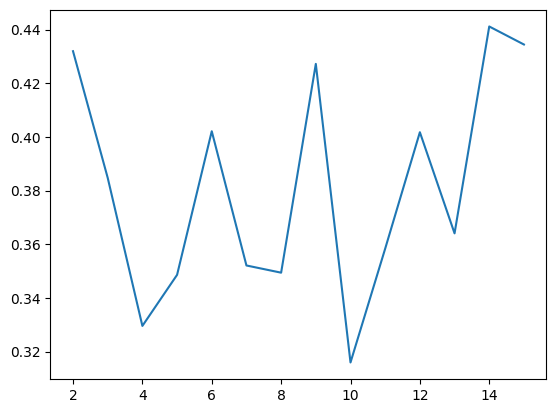

In [18]:
import matplotlib.pyplot as plt
plt.plot(n_topics, coherance)

In [20]:
lda_model=gensim.models.LdaModel(corpus=bow_corpus,id2word=dictionary,num_topics=14,passes=15,random_state=42)

In [19]:
#Print the topics:
print("Topics:")
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


Topics:
(0, '0.017*"gas" + 0.012*"iso" + 0.008*"area" + 0.008*"management" + 0.008*"cil"')
(1, '0.010*"csr" + 0.009*"development" + 0.008*"bank" + 0.008*"water" + 0.007*"initiative"')
(2, '0.015*"bharti" + 0.012*"’" + 0.011*"program" + 0.011*"school" + 0.010*"education"')
(3, '0.006*"l" + 0.006*"international" + 0.006*"financial" + 0.005*"framework" + 0.004*"integrated"')
(4, '0.017*"infosys" + 0.012*"energy" + 0.010*"•" + 0.009*"carbon" + 0.009*"emission"')
(5, '0.015*"esg" + 0.011*"company" + 0.011*"’" + 0.009*"board" + 0.009*"product"')
(6, '0.011*"\'s" + 0.011*"bank" + 0.009*"sustainable" + 0.009*"itc" + 0.008*"csr"')
(7, '0.000*"energy" + 0.000*"bank" + 0.000*"company" + 0.000*"development" + 0.000*"csr"')
(8, '0.013*"foundation" + 0.011*"adani" + 0.011*"program" + 0.011*"health" + 0.008*"athlete"')
(9, '0.019*"port" + 0.015*"india" + 0.008*"’" + 0.008*"resource" + 0.006*"sustainable"')
(10, '0.027*"energy" + 0.020*"renewable" + 0.014*"technology" + 0.014*"towards" + 0.010*"clean"

In [21]:
#Computing coherent score:
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'\nCoherence Score: {coherence_lda}')


Coherence Score: 0.4411611729087487


In [22]:
!pip install wordcloud

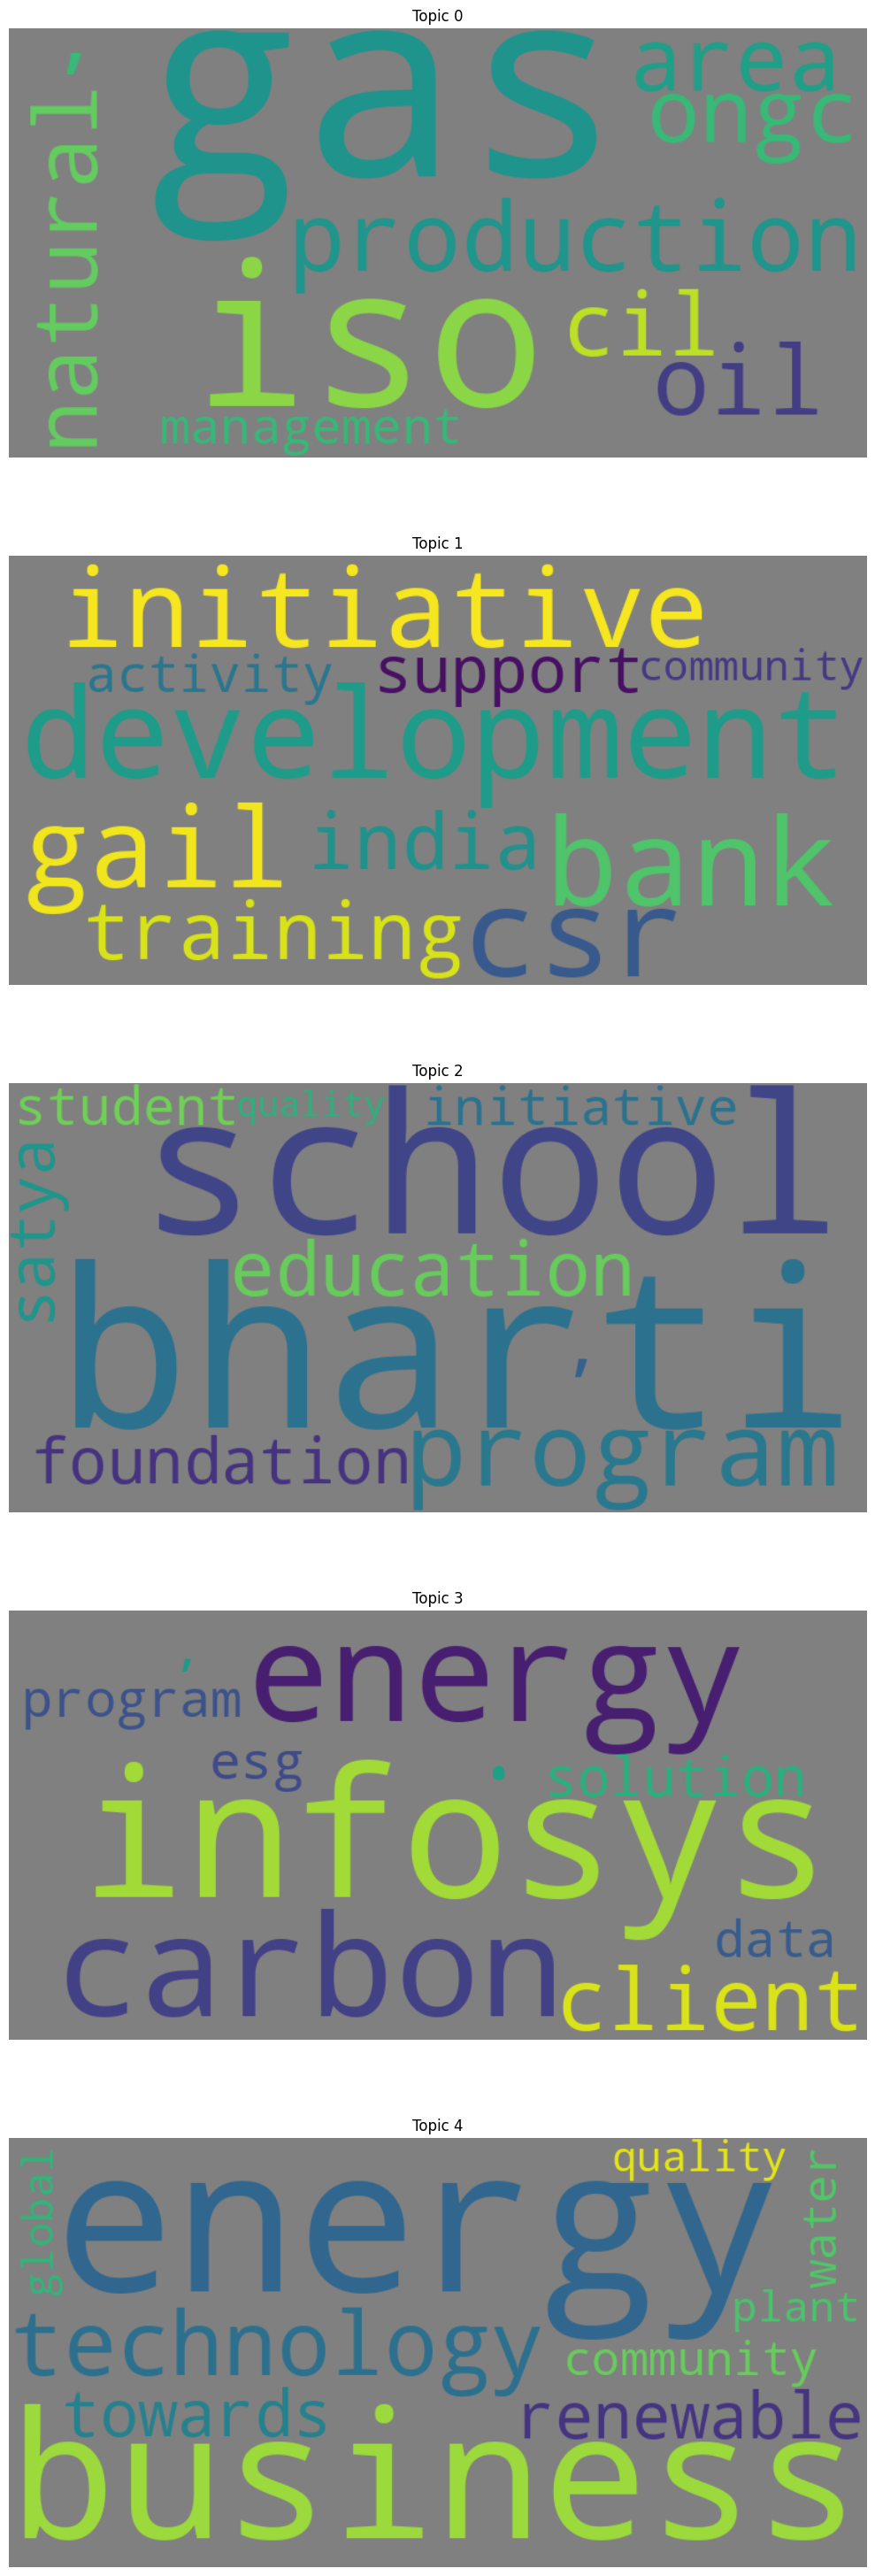

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def visualize_topics_wordcloud(lda_model,num_topics,num_words=10):
    fig,axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(10,6*num_topics),sharex=True)
    for i,ax in enumerate(axes.flatten()):
        topic_words = dict(lda_model.show_topic(i, topn=num_words))
        wordcloud = WordCloud(width=800, height=400, background_color='grey').generate_from_frequencies(topic_words)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Topic {i}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()


visualize_topics_wordcloud(lda_model, num_topics=5, num_words=10)